In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

# [Quickstart](https://pycaret.gitbook.io/docs/get-started/quickstart)

## [Classification](https://pycaret.gitbook.io/docs/get-started/quickstart#classification)

PyCaret’s **Classification** Module is a supervised machine learning module that is used for classifying elements into groups. The goal is to predict the categorical class **labels** which are discrete and unordered. Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative). This module can be used for **binary** or **multiclass** problems. It provides several [pre-processing](https://pycaret.gitbook.io/docs/get-started/preprocessing) features that prepare the data for modeling through the [setup](https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment) function. It has over 18 ready-to-use algorithms and [several plots](https://pycaret.gitbook.io/docs/get-started/functions#plot-model) to analyze the performance of trained models. 


PyCaret の **Classification Module** は、要素をグループに分類するために使用される教師あり機械学習モジュールです。 目標は、離散的で順序付けされていないカテゴリクラス **ラベル**を予測することです。 一般的なユースケースには、顧客のデフォルトの予測 (はいまたはいいえ)、顧客離れの予測 (顧客が離れるか留まるか)、見つかった病気 (陽性または陰性) の予測が含まれます。 このモジュールは、**バイナリ**または**マルチクラス**の問題に使用できます。 [セットアップ](https://pycaret.gitbook.io/docs/get-started/functions#setting-up-environment)関数を使用してモデリング用のデータを準備するいくつかの[前処理](https://pycaret.gitbook.io/docs/get-started/preprocessing)機能を提供します。 18 を超えるすぐに使用できるアルゴリズムと、トレーニング済みモデルのパフォーマンスを分析するための[いくつかのプロット](https://pycaret.gitbook.io/docs/get-started/functions#plot-model)があります。

### Setup

This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: data and target. All the other parameters are optional.

### 設定

この関数は、トレーニング環境を初期化し、変換パイプラインを作成します。 セットアップ関数は、他の関数を実行する前に呼び出す必要があります。 data と target の 2 つの必須パラメータを取ります。 他のすべてのパラメーターはオプションです。

In [2]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


When the `setup` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To handle this, PyCaret displays a prompt, asking for data types confirmation, once you execute the `setup`. You can press enter if all data types are correct or type `quit` to exit the setup.

Ensuring that the data types are correct is really important in PyCaret as it automatically performs multiple type-specific preprocessing tasks which are imperative for machine learning models.

Alternatively, you can also use `numeric_features` and `categorical_features` parameters in the `setup` to pre-define the data types.

`setup` が実行されると、PyCaret の推論アルゴリズムは、特定のプロパティに基づいてすべての機能のデータ型を自動的に推論します。 データ型は正しく推測される必要がありますが、常にそうであるとは限りません。 これを処理するために、「setup」を実行すると、PyCaret はデータ型の確認を求めるプロンプトを表示します。 すべてのデータ型が正しい場合は Enter キーを押すか、`quit`と入力してセットアップを終了します。

データ型が正しいことを確認することは、機械学習モデルに不可欠な複数の型固有の前処理タスクを自動的に実行するため、PyCaret では非常に重要です。

または、`setup`で`numeric_features`および`categorical_features`パラメーターを使用して、データ型を事前に定義することもできます。

In [3]:
from pycaret.classification import *
s = setup(data, target = 'Class variable')

,Description,Value
0,session_id,5945
1,Target,Class variable
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

### モデルの比較

この関数は、交差検証を使用して、モデル ライブラリで使用可能なすべての推定量のパフォーマンスをトレーニングおよび評価します。 この関数の出力は、クロス検証された平均スコアを含むスコアリング グリッドです。 CV 中に評価されたメトリクスには、`get_metrics` 関数を使用してアクセスできます。 カスタム メトリックは、`add_metric` および `remove_metric` 関数を使用して追加または削除できます。

In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7689,0.8371,0.6096,0.7009,0.6436,0.4754,0.4843,0.2790
ada,Ada Boost Classifier,0.7596,0.8202,0.6199,0.6706,0.6406,0.4611,0.4648,0.0220
lr,Logistic Regression,0.7561,0.8035,0.5520,0.6840,0.6053,0.4342,0.4425,0.8550
ridge,Ridge Classifier,0.7543,0.0000,0.5360,0.6901,0.5954,0.4259,0.4372,0.0040
lda,Linear Discriminant Analysis,0.7524,0.7995,0.5412,0.6825,0.5966,0.4241,0.4338,0.0050
gbc,Gradient Boosting Classifier,0.7503,0.8272,0.5886,0.6795,0.6216,0.4379,0.4471,0.0220
rf,Random Forest Classifier,0.7466,0.8230,0.5456,0.6830,0.5976,0.4173,0.4292,0.0530
lightgbm,Light Gradient Boosting Machine,0.7337,0.8156,0.5947,0.6353,0.6084,0.4083,0.4135,0.0200
et,Extra Trees Classifier,0.7262,0.7830,0.5032,0.6403,0.5567,0.3649,0.3741,0.0540
xgboost,Extreme Gradient Boosting,0.7244,0.8026,0.5626,0.6258,0.5865,0.3820,0.3874,0.0390


In [5]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1809, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Analyze Model（モデルの分析）

This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

この関数は、テスト セットでトレーニングされたモデルのパフォーマンスを分析します。 場合によっては、モデルの再トレーニングが必要になる場合があります。

In [5]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

`evaluate_model` can only be used in Notebook since it uses `ipywidget` . You can also use the `plot_model` function to generate plots individually.


`evaluate_model` は `ipywidget` を使用するため、ノートブックでのみ使用できます。 `plot_model` 関数を使用してプロットを個別に生成することもできます。

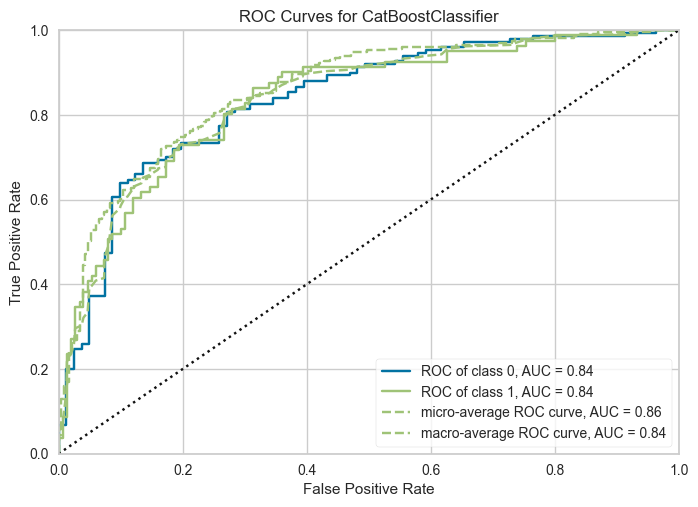

In [6]:
plot_model(best, plot="auc")

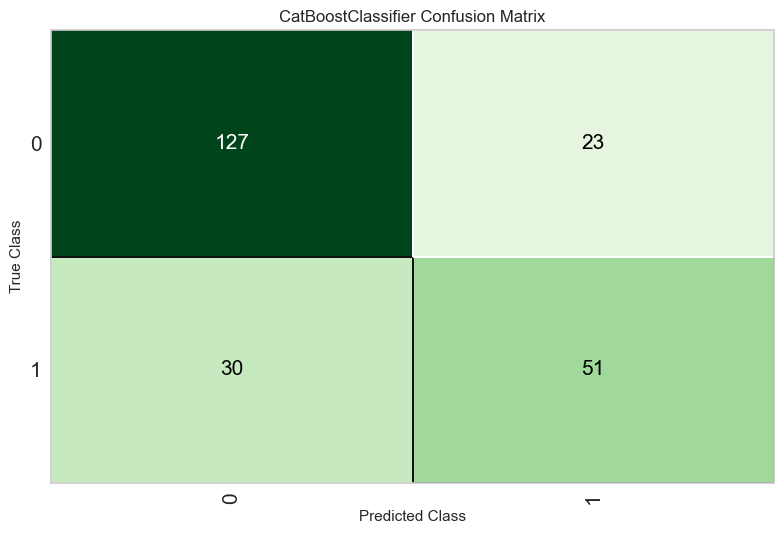

In [7]:
plot_model(best, plot="confusion_matrix")

### Predictions

This function predicts the `Label` and the `Score` (probability of predicted class) columns using a trained model. When `data` is None, it predicts label and score on the test set (created during the `setup` function).


### 予測値

この関数は、学習済みモデルを用いて `Label` と `Score` (予測されるクラスの確率) のカラムを予測する。`data` が None の場合は、テストセット（`setup` 関数で作成される）に対してラベルとスコアを予測する。

In [8]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7706,0.8362,0.6296,0.6892,0.6581,0.4860,0.4871


,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Number of times pregnant_0,Number of times pregnant_1,Number of times pregnant_10,...,Number of times pregnant_3,Number of times pregnant_4,Number of times pregnant_5,Number of times pregnant_6,Number of times pregnant_7,Number of times pregnant_8,Number of times pregnant_9,Class variable,Label,Score
0,90.0,0.0,0.0,0.0,28.000000,0.610,31.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7603
1,81.0,60.0,22.0,0.0,27.700001,0.290,25.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9785
2,150.0,76.0,0.0,0.0,21.000000,0.207,37.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6126
3,95.0,72.0,0.0,0.0,36.799999,0.485,57.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7515
4,125.0,68.0,0.0,0.0,24.700001,0.206,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,134.0,70.0,23.0,130.0,35.400002,0.542,29.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.5492
227,102.0,86.0,36.0,120.0,45.500000,0.127,23.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.9659
228,115.0,98.0,0.0,0.0,52.900002,0.209,28.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0.6449
229,118.0,64.0,23.0,89.0,0.000000,1.731,21.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9749


The evaluation metrics are calculated on the test set. The second output is the `pd.DataFrame` with predictions on the test set (see the last two columns). To generate labels on the unseen (new) dataset, simply pass the dataset in the `predict_model` function

評価指標はテストセットで計算されます。2番目の出力は、テストセットに対する予測値を含む `pd.DataFrame` です（最後の2列を参照してください）。未見の（新しい）データセットに対してラベルを生成するには、単に `predict_model` 関数にデータセットを渡せばよいのです。

In [9]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8971,0.9532,0.8097,0.8857,0.8460,0.7690,0.7708


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.8605
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9182
2,8,183,64,0,0,23.3,0.672,32,1,1,0.6521
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9911
4,0,137,40,35,168,43.1,2.288,33,1,1,0.9362


> Score means the probability of the predicted class (NOT the positive class). If Label is 0 and Score is 0.90, it means 90% probability of class 0. If you want to see the probability of both the classes, simply pass raw_score=True in the predict_model function.

> Score は、予測されたクラス（正のクラスではない）の確率を表します。Label が 0 で Score が 0.90 ならば、クラス 0 の確率が 90% であることを意味します。もし、両方のクラスの確率を確認したい場合は、predict_model関数でraw_score=Trueを渡せばよいのです。

In [10]:
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8971,0.9532,0.8097,0.8857,0.8460,0.7690,0.7708


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,Label,Score_0,Score_1
0,6,148,72,35,0,33.6,0.627,50,1,1,0.1395,0.8605
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9182,0.0818
2,8,183,64,0,0,23.3,0.672,32,1,1,0.3479,0.6521
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9911,0.0089
4,0,137,40,35,168,43.1,2.288,33,1,1,0.0638,0.9362


### Save the model （モデルを保存する）

In [11]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Class variable',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Class variable')),
                 ('fix_perfect', Remove_100(target='Class variable')),
                 ('clean_names', Clean_Colum_Names()

#### To load the model back in environment:

#### モデルを環境にロードするには:

In [12]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Class variable',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeri...
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Class variable')),
                ('fix_perfect', Remove_100(target='Class variable')),
               